# Malignant Comments Classifier project

Submitted By    : Sindhu Shree N

Internship Batch: 19

The main goal of this project is to build a model to classify the comments that are extracted from different sources.

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing training set
train_df=pd.read_csv("maltrain.csv")
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


We can see that the training dataset contains feature id which is unique and the comment_text which are messages by commentors and classifications like malignant, highly malignant, rude, threat, abuse and loathe that have labels 0 and 1 only.

In [3]:
train_df.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [3]:
#importing testing set
test_df=pd.read_csv("maltest.csv")
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


The testing set contains only two features where we need to classify the comments and predict the output.

In [5]:
test_df.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [4]:
print("Train data shape=",train_df.shape)
print("Test data shape=",test_df.shape)

Train data shape= (159571, 8)
Test data shape= (153164, 2)


The training set contains 159571 rows and 8 features. The testing set contains 153164 rows and 2 features.

In [7]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


We can see that in the training set id and comment_text are off object type and remaining all are integer type.Whereas in the testing set both features are off object type.

In [8]:
print(train_df.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [9]:
print(test_df.dtypes)

id              object
comment_text    object
dtype: object


In [10]:
#summary statistics of training set
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since this is a comments which are in text we cannot see any skewness or outliers. Hence 75th percentile and maximum values and mean and median values are in the same range. 

In [11]:
#summary statistics of testing set
test_df.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,e2a4b80332e84822,""" \n\n Let me also add that while this is not ..."
freq,1,1


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


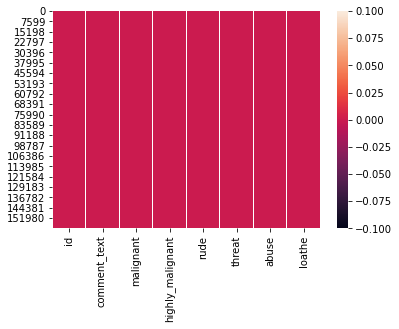

In [12]:
#checking for null values
print(train_df.isnull().sum())
print(sns.heatmap(train_df.isnull()))

We can see that there is no null values.

In [13]:
#correlation of the dataset features
corr=train_df.corr()
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

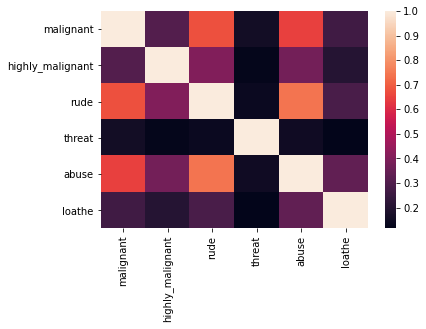

In [14]:
sns.heatmap(corr)

Since we got correlation only for target features so it is not giving much information to us.

In [13]:
#checking the skewness for the features:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

Visualization:

malignant


0    144277
1     15294
Name: malignant, dtype: int64


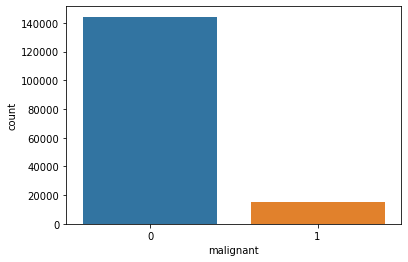

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


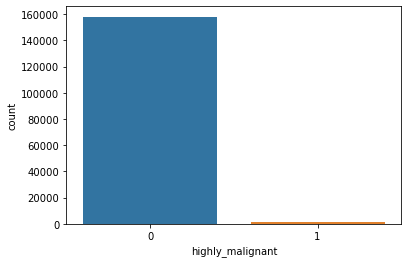

rude


0    151122
1      8449
Name: rude, dtype: int64


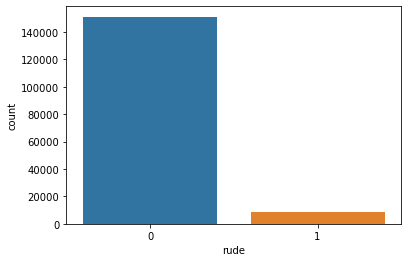

threat


0    159093
1       478
Name: threat, dtype: int64


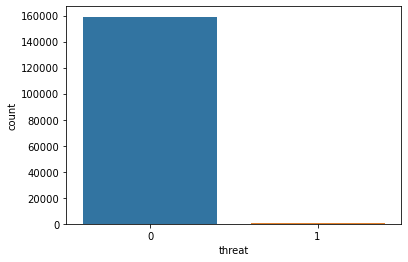

abuse


0    151694
1      7877
Name: abuse, dtype: int64


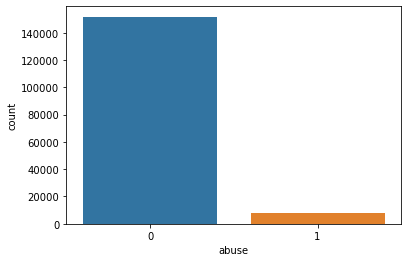

loathe


0    158166
1      1405
Name: loathe, dtype: int64


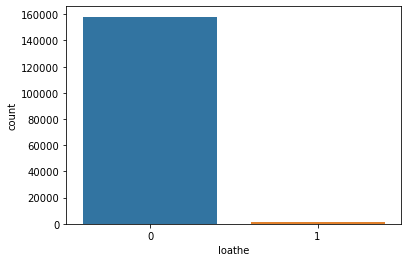

In [5]:
cols=["malignant","highly_malignant","rude","threat","abuse","loathe"]
for i in cols:
    print(i)
    print("\n")
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

By observing above we can say that almost all the target features has most of the zero label which means usage of offensive words are not more when compare to other normal words.

average length of comment: 394.139


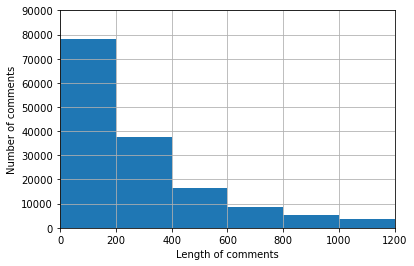

In [8]:
comment=train_df['comment_text']
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

# Preprocessing:

Since this dataset contains the text data we need to clean it before sending them to model evaluation so here we are using natural language processor(tokenization) and wordnetlemmatizer to do the process.

In [6]:
#importing the libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [7]:
#adding a new feature which returns the length of the comment_text text in each row
train_df['length']=train_df["comment_text"].str.len()
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [8]:
#defining a pound term
pound=u'\N{pound sign}'
pound

'£'

Since we need to convert the money symbols and pound is not direct conversion we are defining it above.

# Lemmatizing:

In [9]:
#convert all messages to lower case 
train_df["comment_text"]=train_df["comment_text"].str.lower()

#replace emial addresses with email
train_df["comment_text"]=train_df["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#relace URL's with webaddress
train_df["comment_text"]=train_df["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#replace money symbols with 'dollers' 
train_df["comment_text"]=train_df["comment_text"].str.replace(r'pound|\$','dollers')

#replace 10 digit phone numbers(format include parenthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df["comment_text"]=train_df["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with 'numbr'
train_df["comment_text"]=train_df["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

#removing the punctuations
train_df["comment_text"]=train_df["comment_text"].apply(lambda x:  ' '.join(term for term in x.split() if term not in string.punctuation))

#updating stopwords
stop_words=set(stopwords.words('english') + ['u', 'ur','4','2','im','dont','doin','ure'])
train_df["comment_text"]=train_df["comment_text"].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

#lemmatizing
lem=WordNetLemmatizer()
train_df["comment_text"]=train_df["comment_text"].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [10]:
train_df['clean_length']=train_df.comment_text.str.len()
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [11]:
#total length removal
print('Original Length:', train_df.length.sum())
print('Clean Length:',train_df.clean_length.sum())

Original Length: 62893130
Clean Length: 43575310


We can see after cleaning process the length are decreased.

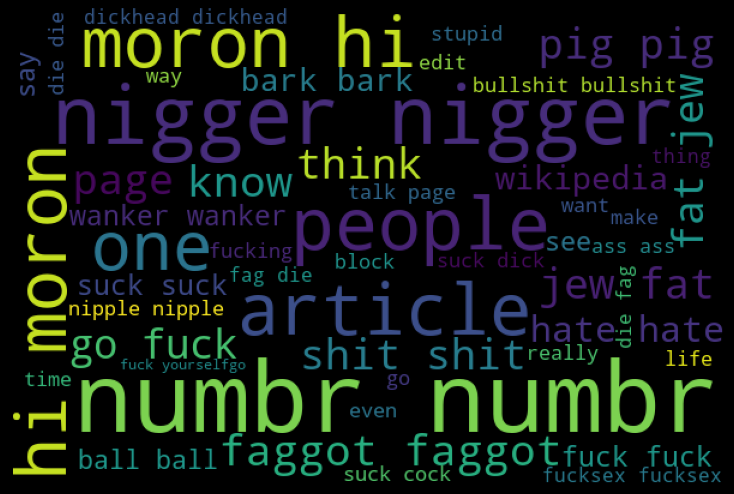

In [12]:
#getting sense of loud words which are offensive
import wordcloud
from wordcloud import WordCloud
offns=train_df["comment_text"][train_df['malignant']==1]
spam_cloud=WordCloud(width=600, height=400, background_color='black',max_words=50).generate(' '.join(offns))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The above figure shows the bad and offensive words that are used in the comments.

Since our labels are multiple in number we create a list for those feature.

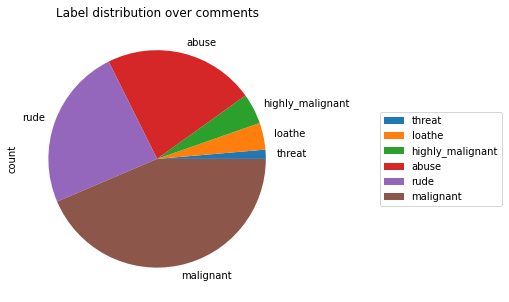

In [13]:
cols_target=["malignant",'highly_malignant','rude','threat','abuse','loathe']
df_distribution=train_df[cols_target].sum()\
                 .to_frame()\
                 .rename(columns={0: 'count'})\
                 .sort_values('count')
df_distribution.plot.pie(y='count', 
                        title='Label distribution over comments',       #creating a pie chart to visualize the density of words in each feature used
                        figsize=(5,5))\
                       .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))                                                     

We can see that the count of malignant is approximately 40%. And rude percentage is around 25, abuse is 20% and remaining 15% words are distributed as highly_malignant,loathe,threat.

Now let us create a new feature called bad in training set in which all these target features are classified and obtained only two labels namely 0 and 1.
In this new feature we are summing all the target values.

In [14]:
target_data=train_df[cols_target]

train_df['bad']=train_df[cols_target].sum(axis=1)
print(train_df['bad'].value_counts())
train_df['bad']=train_df['bad'] > 0
train_df['bad']=train_df['bad'].astype(int)
print(train_df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


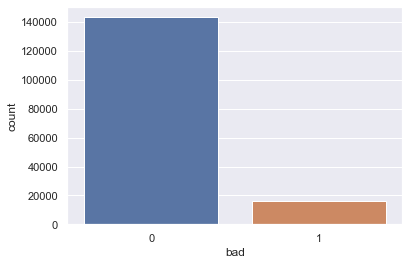

In [15]:
sns.set()
sns.countplot(x='bad',data=train_df)
plt.show()

There are around 20000 bad words in those comments

Feature Extraction:

In [16]:
#convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features=10000, stop_words='english')
features=tf_vec.fit_transform(train_df['comment_text'])
x=features

In [17]:
train_df.shape

(159571, 11)

In [18]:
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::and second time asking, view completely ...",0,0,0,0,0,0,295,211,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page. numbr.numbr,0,0,0,0,0,0,99,49,0
159568,ffee36eab5c267c9,"spitzer umm, there actual article prostitution...",0,0,0,0,0,0,81,68,0
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,116,60,0


In [19]:
test_df.shape

(153164, 2)

In [20]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
y=train_df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [22]:
y_train.shape,y_test.shape

((111699,), (47872,))

Model Evaluation:

# Logistic Regression:

In [59]:
lg=LogisticRegression(C=1, max_iter =3000)
lg.fit(x_train,y_train)
y_pred_train=lg.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train,y_pred_train)))
y_pred_test=lg.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print("\n","Confusion matrix:\n",confusion_matrix(y_test,y_pred_test))
print("\n","Classification report:\n",classification_report(y_test,y_pred_test))

Training accuracy is 0.9592207629432672
Test accuracy is 0.9553601270053476

 Confusion matrix:
 [[42769   236]
 [ 1901  2966]]

 Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43005
           1       0.93      0.61      0.74      4867

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



# Decision Tree Classifier:

In [63]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_train=dt.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train,y_pred_train)))
y_pred_test=dt.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print("\n","Confusion matrix:\n",confusion_matrix(y_test,y_pred_test))
print("\n","Classification report:\n",classification_report(y_test,y_pred_test))

Training accuracy is 0.9986033894663336
Test accuracy is 0.9398604612299465

 Confusion matrix:
 [[41644  1361]
 [ 1518  3349]]

 Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     43005
           1       0.71      0.69      0.70      4867

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



# Random Forest Classifier:

In [23]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train,y_pred_train)))
y_pred_test=rf.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print("\n","Confusion matrix:\n",confusion_matrix(y_test,y_pred_test))
print("\n","Classification report:\n",classification_report(y_test,y_pred_test))

Training accuracy is 0.9986839631509682
Test accuracy is 0.957449030748663

 Confusion matrix:
 [[42493   512]
 [ 1525  3342]]

 Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     43005
           1       0.87      0.69      0.77      4867

    accuracy                           0.96     47872
   macro avg       0.92      0.84      0.87     47872
weighted avg       0.96      0.96      0.96     47872



# KNeighbors Classifier:

In [61]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred_train=knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train,y_pred_train)))
y_pred_test=knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print("\n","Confusion matrix:\n",confusion_matrix(y_test,y_pred_test))
print("\n","Classification report:\n",classification_report(y_test,y_pred_test))

Training accuracy is 0.9222195364327344
Test accuracy is 0.9178434157754011

 Confusion matrix:
 [[42830   175]
 [ 3758  1109]]

 Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     43005
           1       0.86      0.23      0.36      4867

    accuracy                           0.92     47872
   macro avg       0.89      0.61      0.66     47872
weighted avg       0.91      0.92      0.90     47872



# AdaBoost Classifier:

In [64]:
adab=AdaBoostClassifier(n_estimators=100)
adab.fit(x_train,y_train)
y_pred_train=adab.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train,y_pred_train)))
y_pred_test=adab.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print("\n","Confusion matrix:\n",confusion_matrix(y_test,y_pred_test))
print("\n","Classification report:\n",classification_report(y_test,y_pred_test))

Training accuracy is 0.9503755628967135
Test accuracy is 0.9486129679144385

 Confusion matrix:
 [[42567   438]
 [ 2022  2845]]

 Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     43005
           1       0.87      0.58      0.70      4867

    accuracy                           0.95     47872
   macro avg       0.91      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



All the models are giving good accuracy but Random forest classifier is giving the highest accuracy so let us see the cross validation scores.

# Cross Validation Score:

In [65]:
print(cross_val_score(lg,x,y,cv=5).mean()*100)

95.60070362214542


In [28]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

94.5860497162876


In [29]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

97.87044903074663


In [30]:
print(cross_val_score(knn,x,y,cv=5).mean()*100)

91.6289445348721


In [31]:
print(cross_val_score(adab,x,y,cv=5).mean()*100)

93.99861297614439


Thus Random Forest Classifier and Logistic Regression is giving almost similar and improved cross validation score but Random Forest classifier is the having the highest score so we will use Random forest for hyperparameter tuning.

# Hyper Parameter Tuning:

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
#passing hyper parameters for the tuning
parameters={'n_estimators':[20,30],
            'max_depth':[20,25],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,6],
            'min_samples_leaf':[1,4]}
            
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 6],
                         'n_estimators': [20, 30]})

In [34]:
best_parameters=grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [39]:
(grid.best_score_)*100

98.23349973026929

In [36]:
clf=RandomForestClassifier(n_estimators=20,max_depth=25,criterion='gini',min_samples_split=2,min_samples_leaf=1)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=20)

In [40]:
clf.score(x_test,y_test)*100

97.96298462566845

Thus we got an improved score in this model and hence it is the best fit for our current dataset.

# AUC ROC Curve:

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

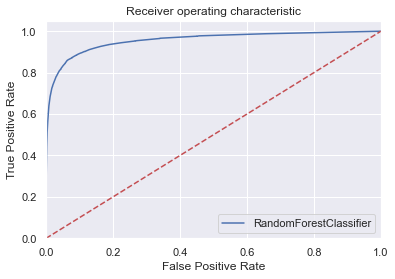

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

Thus the obtained graph is showing the good accuracy that we obtained in random forest classifier.

# Predicting output for the test dataset:

In [44]:
test_data=tf_vec.fit_transform(test_df['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [45]:
#predicting values
prediction=rf.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
#creating the dataframe for the obtained prediction
df=pd.DataFrame({})
df['Predicted output']=prediction
df.head()

,Predicted output
0,0
1,0
2,0
3,0
4,0


In [47]:
len(df)   

153164

# Conclusion:

In [53]:
#concatenating the test data and the predicted output dataframes
frames=[test_df,df]
result=pd.concat(frames,axis=1)

In [54]:
result

,id,comment_text,Predicted output
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0


In [55]:
#saving the obtained result(dataframe) in csv file
final=result.to_csv("test.csv")

# Saving the model

In [50]:
import joblib
joblib.dump(rf,"malig.pkl")

['malig.pkl']

Thus most of the classification models hit the accuracy more than 90%. And Random Forest Classifier has the best accuracy and it is the best fit for the present dataset.